# Clustering - Mall Customers Segmentation

In [1]:
#import Library to import data
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("D:\Data Science\Mini Project\DS3_C6_S3_MallCustomers_Data_Project.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

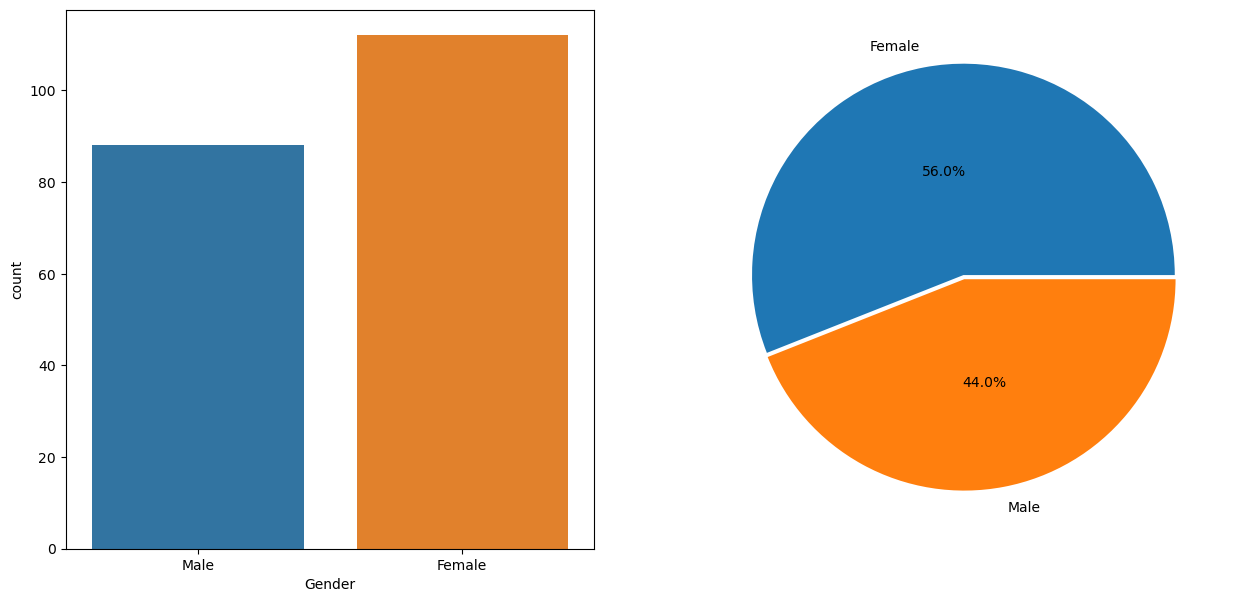

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["Gender"].value_counts()
labels =data.keys()  

sns.countplot(x = df["Gender"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.0], labels = labels, pctdistance = 0.5) 
                                                                     
plt.show()


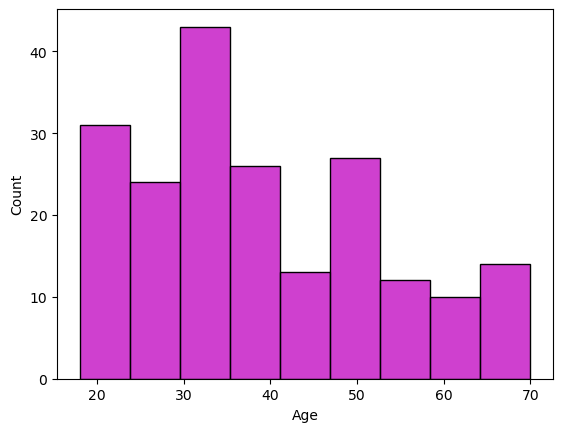

In [13]:
sns.histplot(x = df["Age"], color = "m")
plt.show()

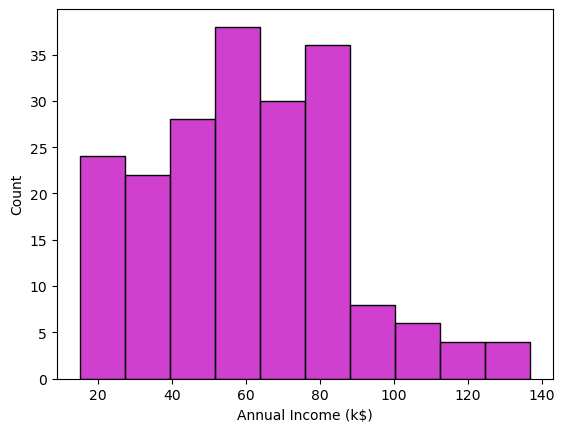

In [14]:
sns.histplot(x = df["Annual Income (k$)"], color = "m")
plt.show()

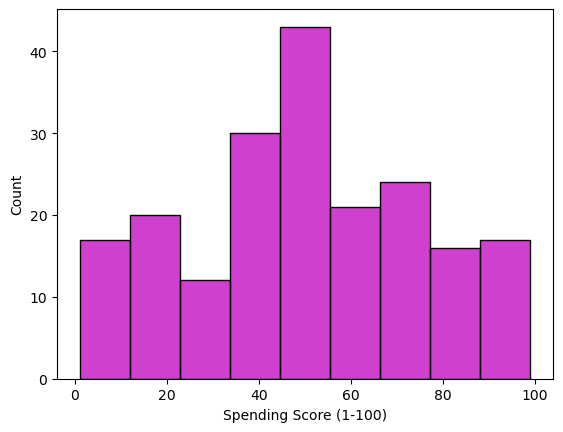

In [15]:
sns.histplot(x = df["Spending Score (1-100)"], color = "m")
plt.show()

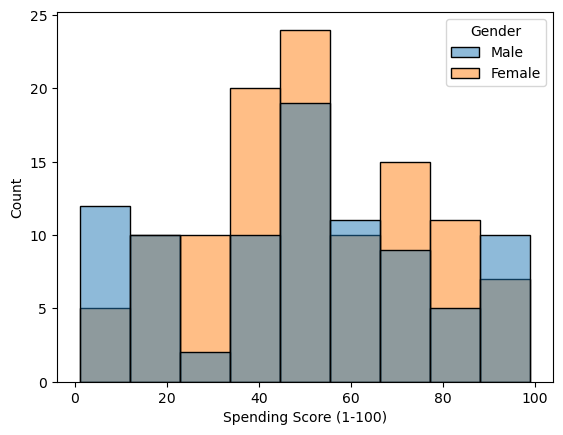

In [20]:
sns.histplot(x = df["Spending Score (1-100)"], hue = df["Gender"])
plt.show()

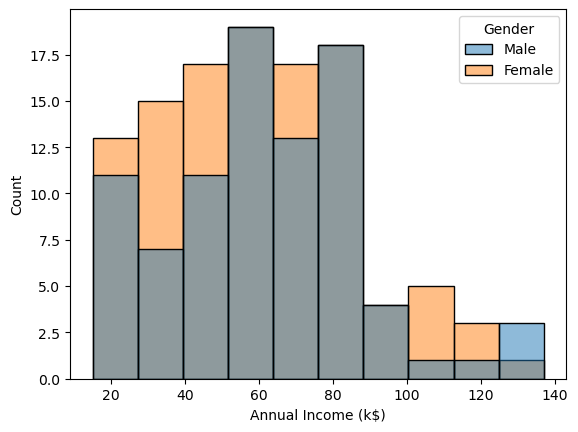

In [21]:
sns.histplot(x = df["Annual Income (k$)"], hue = df["Gender"])
plt.show()

In [28]:
import matplotlib.pyplot as plt

def plot_scatter(df, X, y, color='Violet'):
    
    plt.scatter(df[X], df[y], color= color)
    plt.xlabel(X)
    plt.ylabel(y)
    plt.show()

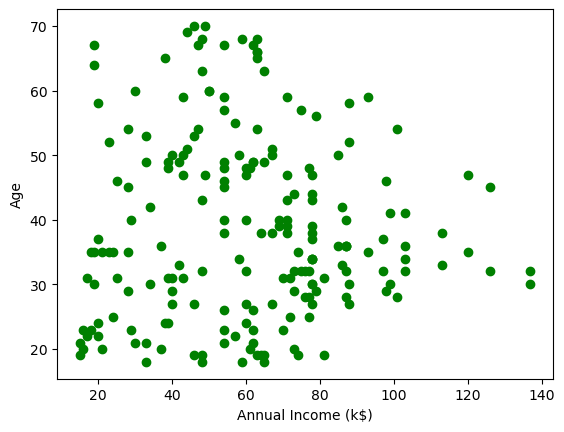

In [29]:
plot_scatter(df, "Annual Income (k$)", "Age", color='g')

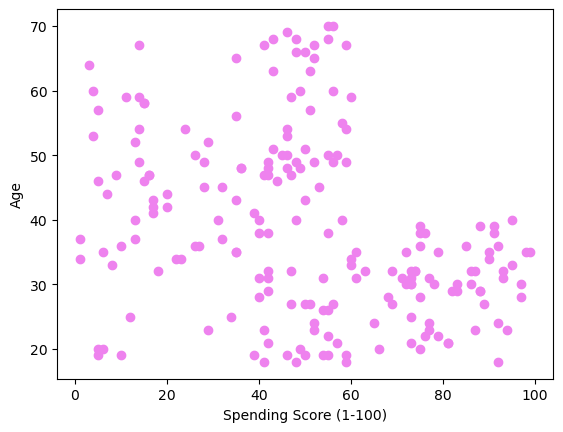

In [32]:
plot_scatter(df, "Spending Score (1-100)", "Age", color='violet')

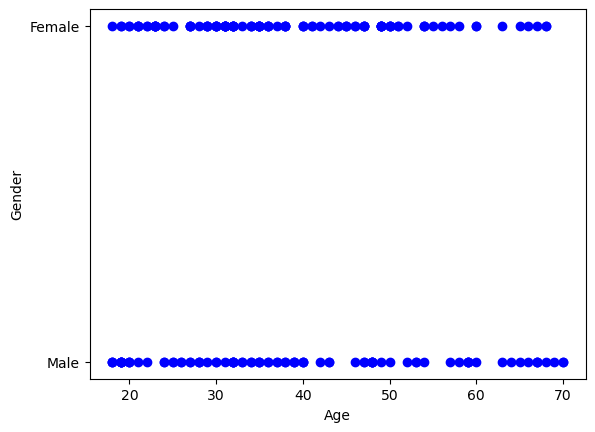

In [33]:
plot_scatter(df, "Age", "Gender", color='b')

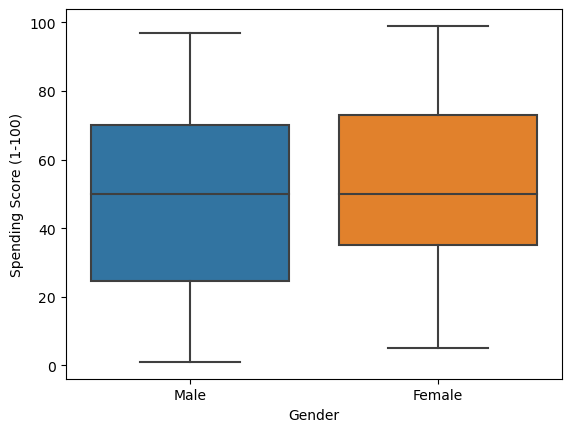

In [43]:


sns.boxplot(y = df["Spending Score (1-100)"], x = df["Gender"])
plt.show()


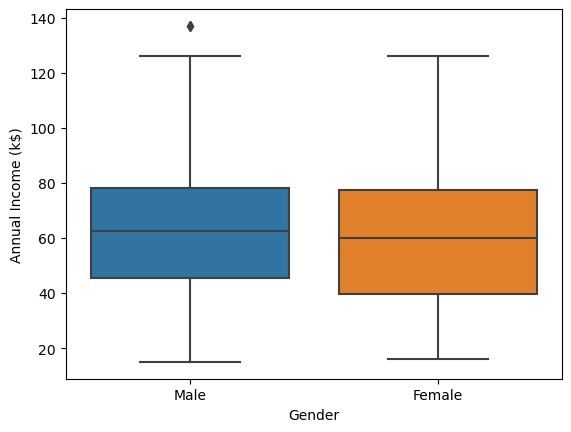

In [35]:
sns.boxplot(y = df["Annual Income (k$)"], x = df["Gender"])
plt.show()

# Data Preprocessing

In [44]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### As there is no null values so, no need of null value treatment

## Label encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()

In [47]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [48]:
df.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [51]:
customer_df = df

## Spliting the data

In [50]:
X = df.iloc[:,[3,4]].values

# Model Building

## 1. K_means 

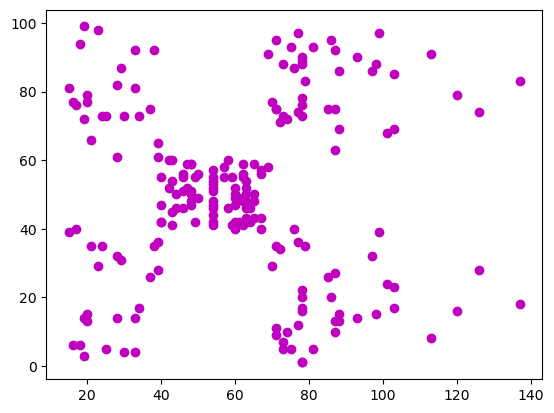

In [53]:
plt.scatter(X[:,0], X[:,1], c='m')

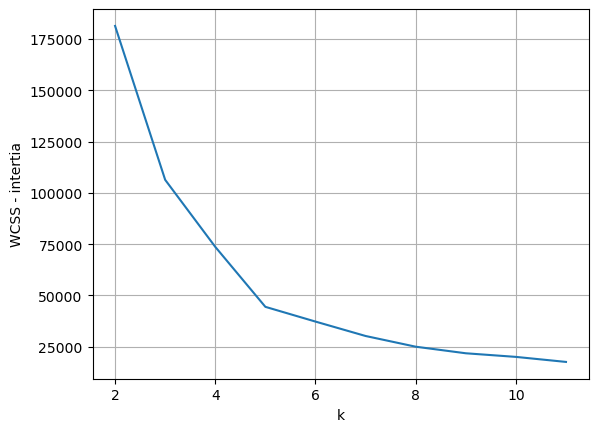

In [56]:
from sklearn.cluster import KMeans
WCSS = []

for k in range(2,12):
    kmean_model = KMeans(n_clusters = k)
    kmean_model.fit(X)
    WCSS.append(kmean_model.inertia_)
    
plt.plot(range(2,12), WCSS)
plt.grid(True)
plt.xlabel("k")
plt.ylabel('WCSS - intertia')
plt.show()

### Interpretation : From above wcss k = 5

In [57]:
kmean_model = KMeans(n_clusters=5)
kmean_model.fit(X)

KMeans(n_clusters=5)

In [58]:
c_centre = kmean_model.cluster_centers_
c_centre

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

In [59]:
k_label = kmean_model.labels_
k_label

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

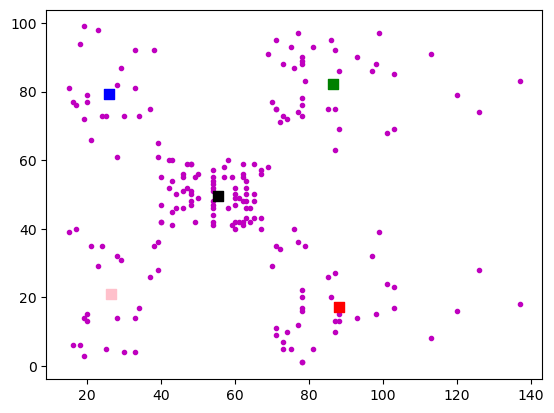

In [84]:
centroid_colors=['red','green','pink','black','blue']
c=0
plt.scatter(X[ : , 0], X[ : , 1], marker='.', c='m')
for i,j in kmean_model.cluster_centers_:
 plt.scatter(i, j, s=50, c=centroid_colors[c], marker='s')
 c=c+1
plt.show()

## 2. Hierarchical_Clustering

### Plotting Dendogram

In [68]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

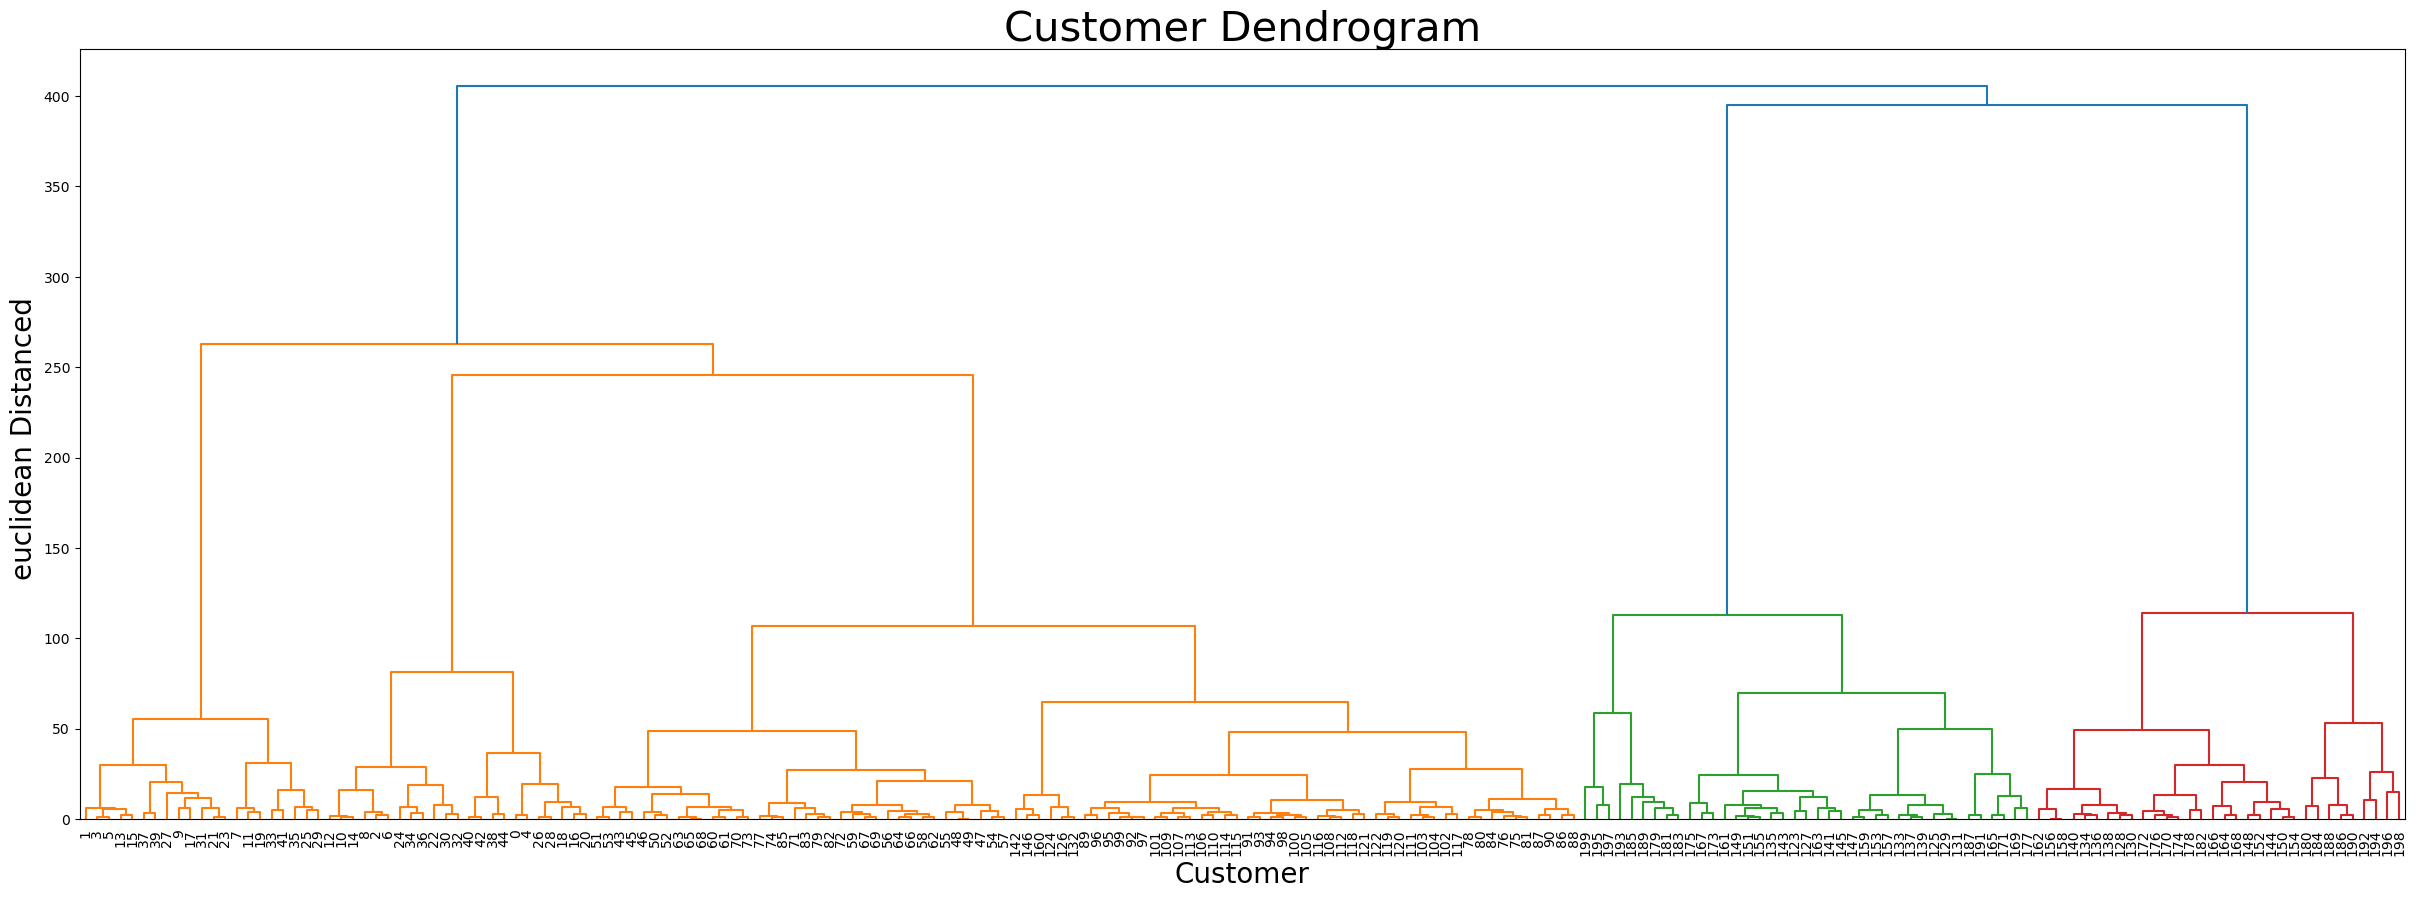

In [69]:
plt.figure(figsize =(30,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"), labels= customer_df.index)
ax=plt.gca()
ax.tick_params(axis = "x", which = "major", labelsize= 10)
plt.title("Customer Dendrogram", fontsize = 30)
plt.xlabel("Customer", fontsize = 20)
plt.ylabel("euclidean Distanced ", fontsize=20)
plt.show()

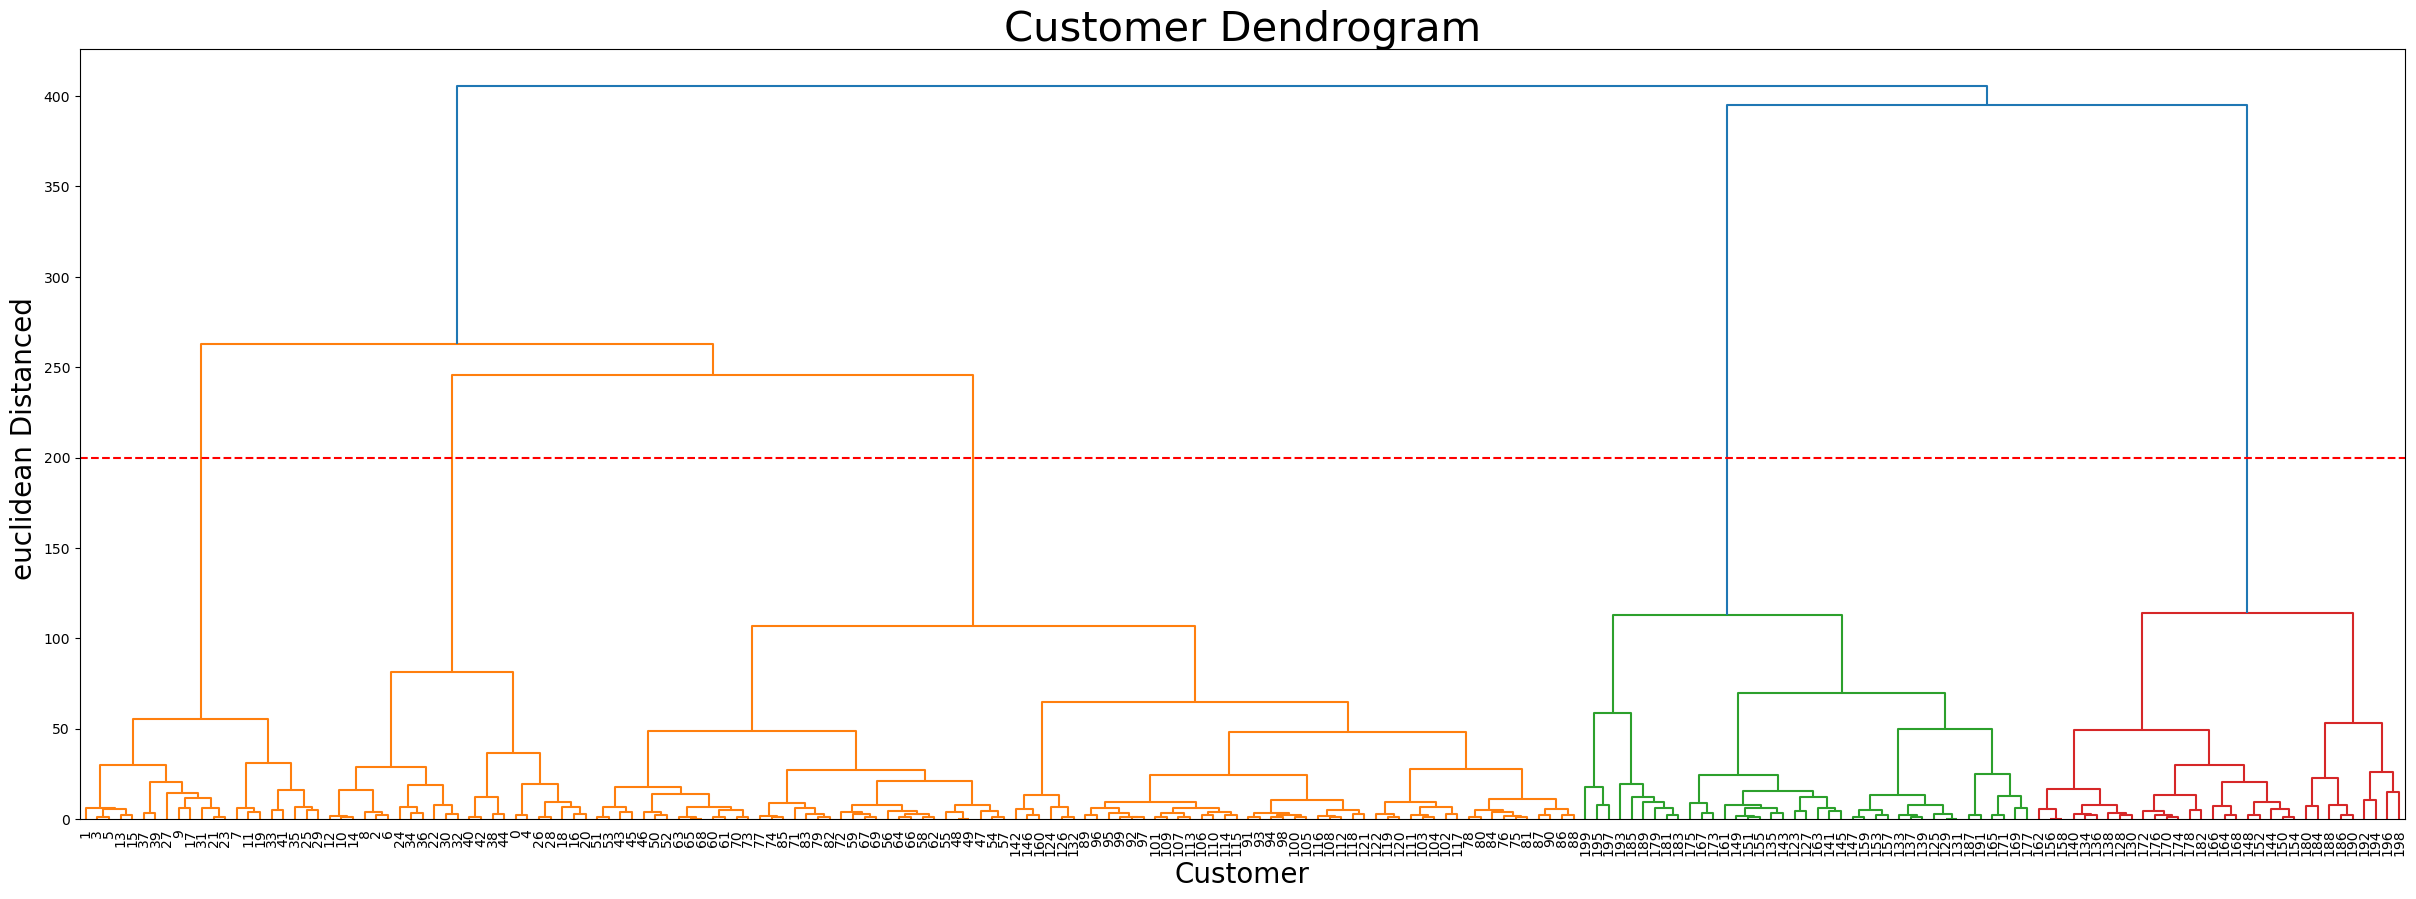

In [70]:
plt.figure(figsize =(30,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"), labels= customer_df.index)
plt.axhline(y=200, color= 'r', linestyle= "--")
ax=plt.gca()
ax.tick_params(axis = "x", which = "major", labelsize= 10)
plt.title("Customer Dendrogram", fontsize = 30)
plt.xlabel("Customer", fontsize = 20)
plt.ylabel("euclidean Distanced ", fontsize=20)
plt.show()

In [71]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

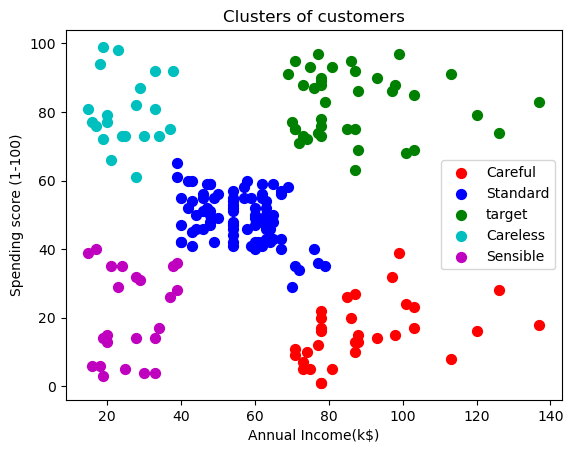

In [72]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50,  c= 'r', label='Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50,  c= 'b', label='Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50,  c= 'g', label='target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50,  c= 'c', label='Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50,  c= 'm', label='Sensible')
plt.title("Clusters of customers")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending score (1-100)")
plt.legend()
plt.show()

## 3. DBSCAN

In [73]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(X[[0,1]])

DBSCAN()

In [79]:
import warnings
import matplotlib
warnings.filterwarnings("ignore")

In [89]:
X = pd.DataFrame(X)

In [137]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=7)
nbrs = neigh.fit(X[[0,1]])
distances, indices= nbrs.kneighbors(X[[0,1]])

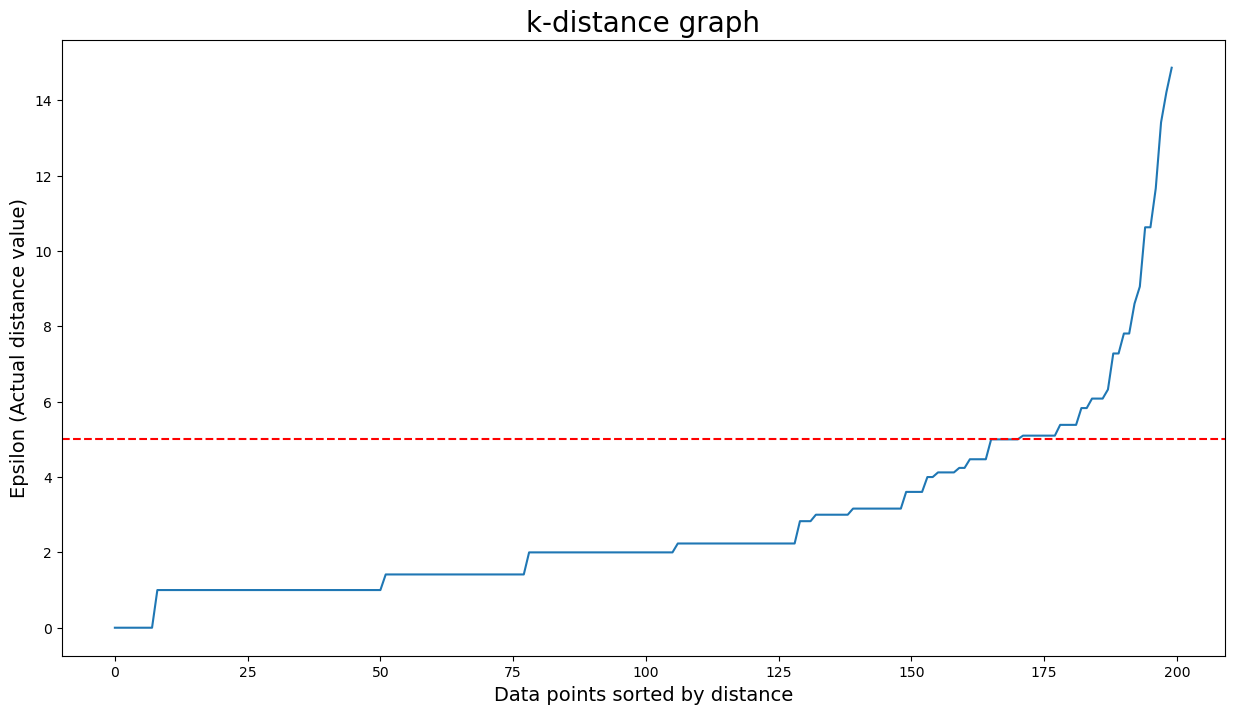

In [138]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=5, color= "r", linestyle ="--")
plt.title("k-distance graph", fontsize=20)
plt.xlabel("Data points sorted by distance", fontsize =14)
plt.ylabel("Epsilon (Actual distance value)", fontsize = 14)
plt.show()

In [145]:
eps_optimum = 5
for min_samples_list in [10,11,12,13,14,15,16]:
    Clusterer = DBSCAN(eps = eps_optimum, min_samples= min_samples_list)
    Cluster_labels = Clusterer.fit_predict(X)
    #print(Cluster_labels)
    
    x=  Cluster_labels +2 
    y= np.bincount(x)
    
    ii = np.nonzero(y)[0]
    
    results = list(zip(ii,y[ii]))
    #print(results)
    print("eps", eps_optimum, "| min samples =", min_samples_list, "| Number of clusters obtained :", results)

eps 5 | min samples = 10 | Number of clusters obtained : [(1, 139), (2, 26), (3, 35)]
eps 5 | min samples = 11 | Number of clusters obtained : [(1, 142), (2, 26), (3, 32)]
eps 5 | min samples = 12 | Number of clusters obtained : [(1, 148), (2, 18), (3, 34)]
eps 5 | min samples = 13 | Number of clusters obtained : [(1, 152), (2, 14), (3, 34)]
eps 5 | min samples = 14 | Number of clusters obtained : [(1, 156), (2, 14), (3, 30)]
eps 5 | min samples = 15 | Number of clusters obtained : [(1, 177), (2, 23)]
eps 5 | min samples = 16 | Number of clusters obtained : [(1, 181), (2, 19)]


In [146]:
eps_optimum = 5
for min_samples_list in [5,6,7,8,9]:
    Clusterer = DBSCAN(eps = eps_optimum, min_samples= min_samples_list)
    Cluster_labels = Clusterer.fit_predict(X)
    #print(Cluster_labels)
    
    x=  Cluster_labels +2 
    y= np.bincount(x)
    
    ii = np.nonzero(y)[0]
    
    results = list(zip(ii,y[ii]))
    #print(results)
    print("eps", eps_optimum, "| min samples =", min_samples_list, "| Number of clusters obtained :", results)

eps 5 | min samples = 5 | Number of clusters obtained : [(1, 89), (2, 6), (3, 76), (4, 10), (5, 9), (6, 10)]
eps 5 | min samples = 6 | Number of clusters obtained : [(1, 100), (2, 76), (3, 10), (4, 6), (5, 8)]
eps 5 | min samples = 7 | Number of clusters obtained : [(1, 119), (2, 73), (3, 8)]
eps 5 | min samples = 8 | Number of clusters obtained : [(1, 123), (2, 69), (3, 8)]
eps 5 | min samples = 9 | Number of clusters obtained : [(1, 136), (2, 64)]


In [155]:
dbscan_opt=DBSCAN(eps=5,min_samples=5)
y_pred = dbscan_opt.fit(X[[0,1]])

In [156]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_
X['DBSCAN_opt_labels'].value_counts()

-1    87
 1    78
 2    10
 4    10
 3     9
 0     6
Name: DBSCAN_opt_labels, dtype: int64

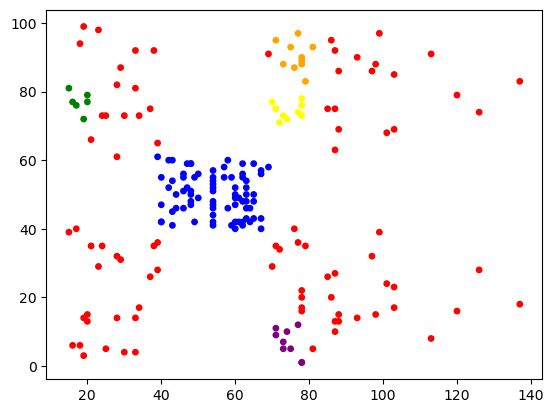

Silhouette Coefficient: 0.114


In [161]:
from sklearn import metrics
colors = ['red', 'green', 'blue', 'yellow','purple', 'orange']
plt.scatter(X[0], X[1], c=X['DBSCAN_opt_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.show()

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X[[0, 1]], X['DBSCAN_opt_labels']))

# Interpretation :

1. In K_means and hierarchical  clustering  we got proper cluster and visualize properly but in Dbscan cluster we cant see the proper cluster formation.
2.DBSCAN is a density-based clustering algorithm that is designed to find clusters of arbitrary shape. Unlike K-means and hierarchical clustering, DBSCAN does not make any assumptions about the number of clusters or their shape. Instead, it groups together points that are close to each other in terms of density.

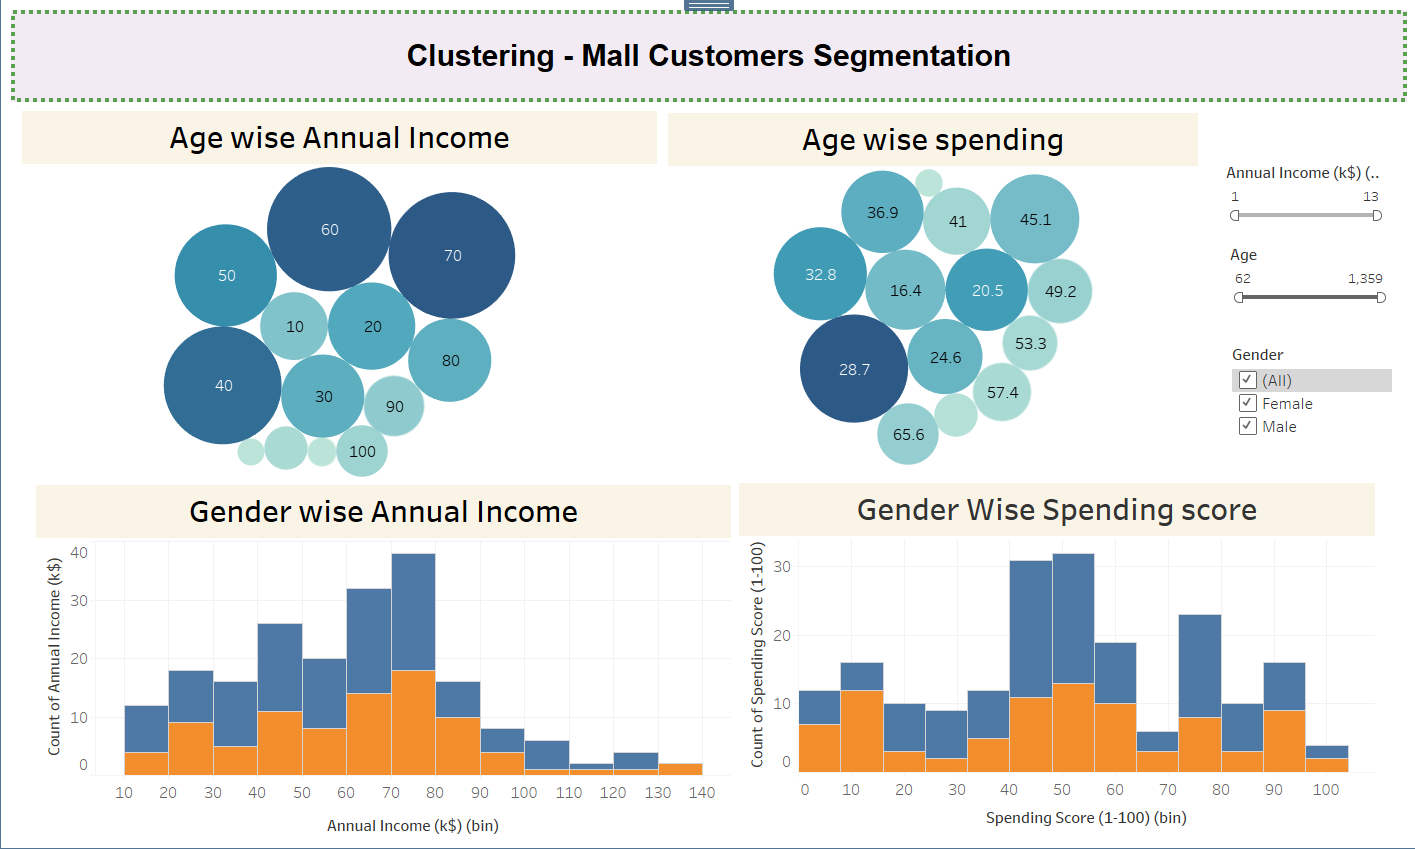